# Descarga dataset

Los datos son almacenados en S3.

interactions.csv: Interacciones entre el producto y el usuario.

items.csv: Todos los productos disponibles.

users.csv: Todos los usuarios disponibles.

In [19]:
import boto3
import os

s3 = boto3.client('s3')
data_dir = "data"
local_folder = './data/'
os.makedirs(local_folder, exist_ok=True)
local_file_path = os.path.join(local_folder, 'interactions.csv')
s3.download_file('kdcatucuambal', 'dataset-personalize/interactions.csv', local_file_path)
local_file_path = os.path.join(local_folder, 'items.csv')
s3.download_file('kdcatucuambal', 'dataset-personalize/items.csv', local_file_path)
local_file_path = os.path.join(local_folder, 'users.csv')
s3.download_file('kdcatucuambal', 'dataset-personalize/users.csv', local_file_path)


## Exploración y preparación dataset

PRODUCTO (ITEMS)

In [20]:
import pandas as pd
import numpy as numpy
pd.set_option('display.max_columns', 500)     # Make sure we can see all of the columns
pd.set_option('display.max_rows', 20)         # Keep the output on one page

items = pd.read_csv(data_dir+'/items.csv',index_col='ITEM_ID')
items.sample(5)


,NAME,PRICE
ITEM_ID,,
223,NOT,0.0
206,MCP,0.0
42,SBA,NaN
212,HFV,0.0
225,NVO,0.0


USUARIOS

In [77]:
users = pd.read_csv(data_dir+'/users.csv')
users.sample(5)

,USER_ID,GENDER,CUSTOMER_TYPE,ACTIVITY,HAVE_RETENTION,BAD_REFERENCE_COUNTER,MARITAL_STATUS,NUMBER_OF_DEPENDENTS,NUMBER_OF_CHILDREN,LEVEL_OF_STUDY,HAVE_ASSETS,AMOUNT_OF_INCOME,AMOUNT_OF_EXPENSE
2075,2141,FEMALE,C,NaN,N,NaN,MARRIED,NaN,NaN,NaN,NaN,NaN,NaN
846,874,FEMALE,P,NaN,S,1.0,SINGLE,NaN,NaN,NaN,NaN,NaN,0.0
1016,1051,FEMALE,P,117.0,N,1.0,MARRIED,1.0,NaN,7.0,NaN,0.01,0.0
762,782,FEMALE,P,117.0,N,1.0,MARRIED,1.0,NaN,7.0,NaN,0.01,0.0
2626,2727,FEMALE,P,117.0,N,1.0,MARRIED,1.0,NaN,7.0,NaN,0.01,0.0


INTERACCIONES (USUARIO Y PRODUCTO)

In [22]:
interactions = pd.read_csv(data_dir+'/interactions.csv',index_col='USER_ID')
interactions.sample(5)

,ITEM_ID,TIMESTAMP
USER_ID,,
2804,4,1686467483
5259,4,1679537107
5143,215,1662657783
506,4,1675622653
353,211,1643710823


Frecuencia de productos

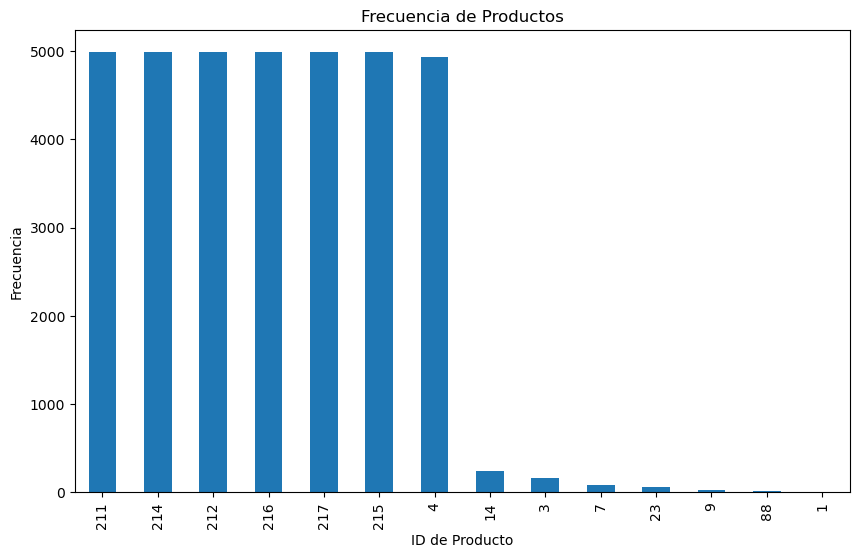

In [23]:
import matplotlib.pyplot as plt
from collections import Counter
# Extracción de ITEM_ID en una lista

item_ids = interactions['ITEM_ID']
item_id_counts = item_ids.value_counts()

# Graficar el histograma de la frecuencia de los item_ids
plt.figure(figsize=(10, 6))
item_id_counts.plot(kind='bar')
plt.xlabel('ID de Producto')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Productos')
plt.show()

In [83]:
users['ACTIVITY'] = users['ACTIVITY'].astype(float)
users.dtypes

USER_ID                    int64
GENDER                    object
CUSTOMER_TYPE             object
ACTIVITY                 float64
HAVE_RETENTION            object
BAD_REFERENCE_COUNTER    float64
MARITAL_STATUS            object
NUMBER_OF_DEPENDENTS     float64
NUMBER_OF_CHILDREN       float64
LEVEL_OF_STUDY           float64
HAVE_ASSETS              float64
AMOUNT_OF_INCOME         float64
AMOUNT_OF_EXPENSE        float64
dtype: object

In [84]:
print(users.isnull().any());
users.describe()

USER_ID                  False
GENDER                   False
CUSTOMER_TYPE            False
ACTIVITY                  True
HAVE_RETENTION           False
BAD_REFERENCE_COUNTER     True
MARITAL_STATUS           False
NUMBER_OF_DEPENDENTS      True
NUMBER_OF_CHILDREN        True
LEVEL_OF_STUDY            True
HAVE_ASSETS               True
AMOUNT_OF_INCOME          True
AMOUNT_OF_EXPENSE         True
dtype: bool


,USER_ID,ACTIVITY,BAD_REFERENCE_COUNTER,NUMBER_OF_DEPENDENTS,NUMBER_OF_CHILDREN,LEVEL_OF_STUDY,HAVE_ASSETS,AMOUNT_OF_INCOME,AMOUNT_OF_EXPENSE
count,4996.000000,4.590000e+03,4935.000000,4705.000000,0.0,4583.000000,0.0,4.592000e+03,4960.0
mean,2709.173539,7.513867e+04,1.000608,0.999787,NaN,6.969671,NaN,1.550500e+03,0.0
std,1644.315661,4.922174e+06,0.058695,0.251272,NaN,0.414908,NaN,2.550588e+04,0.0
min,1.000000,2.200000e+01,0.000000,0.000000,NaN,1.000000,NaN,0.000000e+00,0.0
25%,1291.750000,1.170000e+02,1.000000,1.000000,NaN,7.000000,NaN,1.000000e-02,0.0
50%,2566.500000,1.170000e+02,1.000000,1.000000,NaN,7.000000,NaN,1.000000e-02,0.0
75%,4135.250000,1.170000e+02,1.000000,1.000000,NaN,7.000000,NaN,1.000000e-02,0.0
max,5654.000000,3.333233e+08,5.000000,7.000000,NaN,8.000000,NaN,1.200000e+06,0.0


In [85]:
#Set media in null data

bad_reference_media = users['BAD_REFERENCE_COUNTER'].mean();
users['BAD_REFERENCE_COUNTER'] = users['BAD_REFERENCE_COUNTER'].fillna(bad_reference_media)

activity_media = users['ACTIVITY'].mean()
activity_media = activity_media if not pd.isna(activity_media) else 0
users['ACTIVITY'] = users['ACTIVITY'].fillna(activity_media)

number_of_deps_media = users['NUMBER_OF_DEPENDENTS'].mean()
number_of_deps_media = number_of_deps_media if not pd.isna(number_of_deps_media) else 0
users['NUMBER_OF_DEPENDENTS'] = users['NUMBER_OF_DEPENDENTS'].fillna(number_of_deps_media)

number_of_children_media = (users['NUMBER_OF_CHILDREN'].mean())
number_of_children_media = number_of_children_media if not pd.isna(number_of_children_media) else 0
users['NUMBER_OF_CHILDREN'] = users['NUMBER_OF_CHILDREN'].fillna(number_of_children_media)

level_of_study_media = (users['LEVEL_OF_STUDY'].mean())
level_of_study_media = level_of_study_media if not pd.isna(level_of_study_media) else 0
users['LEVEL_OF_STUDY'] = users['LEVEL_OF_STUDY'].fillna(level_of_study_media)

have_assets_media = (users['HAVE_ASSETS'].mean())
have_assets_media = have_assets_media if not pd.isna(have_assets_media) else 0
users['HAVE_ASSETS'] = users['HAVE_ASSETS'].fillna(have_assets_media)

amount_of_income_media = (users['AMOUNT_OF_INCOME'].mean())
amount_of_income_media = amount_of_income_media if not pd.isna(amount_of_income_media) else 0
users['AMOUNT_OF_INCOME'] = users['AMOUNT_OF_INCOME'].fillna(amount_of_income_media)

amount_of_expense_media = (users['AMOUNT_OF_EXPENSE'].mean())
amount_of_expense_media = amount_of_expense if not pd.isna(amount_of_expense_media) else 0
users['AMOUNT_OF_EXPENSE'] = users['AMOUNT_OF_EXPENSE'].fillna(amount_of_expense_media)

print(users.isnull().any());
users.describe()


USER_ID                  False
GENDER                   False
CUSTOMER_TYPE            False
ACTIVITY                 False
HAVE_RETENTION           False
BAD_REFERENCE_COUNTER    False
MARITAL_STATUS           False
NUMBER_OF_DEPENDENTS     False
NUMBER_OF_CHILDREN       False
LEVEL_OF_STUDY           False
HAVE_ASSETS              False
AMOUNT_OF_INCOME         False
AMOUNT_OF_EXPENSE        False
dtype: bool


,USER_ID,ACTIVITY,BAD_REFERENCE_COUNTER,NUMBER_OF_DEPENDENTS,NUMBER_OF_CHILDREN,LEVEL_OF_STUDY,HAVE_ASSETS,AMOUNT_OF_INCOME,AMOUNT_OF_EXPENSE
count,4996.000000,4.996000e+03,4996.000000,4996.000000,4996.0,4996.000000,4996.0,4.996000e+03,4996.0
mean,2709.173539,7.513867e+04,1.000608,0.999787,0.0,6.969671,0.0,1.550500e+03,0.0
std,1644.315661,4.717895e+06,0.058336,0.243843,0.0,0.397385,0.0,2.445266e+04,0.0
min,1.000000,2.200000e+01,0.000000,0.000000,0.0,1.000000,0.0,0.000000e+00,0.0
25%,1291.750000,1.170000e+02,1.000000,1.000000,0.0,7.000000,0.0,1.000000e-02,0.0
50%,2566.500000,1.170000e+02,1.000000,1.000000,0.0,7.000000,0.0,1.000000e-02,0.0
75%,4135.250000,1.170000e+02,1.000000,1.000000,0.0,7.000000,0.0,1.000000e-02,0.0
max,5654.000000,3.333233e+08,5.000000,7.000000,0.0,8.000000,0.0,1.200000e+06,0.0


In [86]:
#!mkdir $personalize_data_dir
personalize_data_dir = "p-data"
users.to_csv((personalize_data_dir + "/usersv2.csv"), index=False, float_format='%.0f')
s3.upload_file(personalize_data_dir + "/usersv2.csv", 'kdcatucuambal', 'dataset-personalize/usersv2.csv')

## Creando dataset groups ITEMS

In [66]:
# Configure the SDK to Personalize:
import json
personalize = boto3.client('personalize')
personalize_runtime = boto3.client('personalize-runtime')

create_dataset_group_response = personalize.create_dataset_group(
    name = "test_personalize_products"
)
dataset_group_arn = create_dataset_group_response['datasetGroupArn']

print(json.dumps(create_dataset_group_response, indent=2))

{
  "datasetGroupArn": "arn:aws:personalize:us-east-1:818802851925:dataset-group/test_personalize_products",
  "ResponseMetadata": {
    "RequestId": "eca78014-07a0-4d45-8c15-040a1de311b0",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 19:09:57 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "104",
      "connection": "keep-alive",
      "x-amzn-requestid": "eca78014-07a0-4d45-8c15-040a1de311b0"
    },
    "RetryAttempts": 0
  }
}


In [68]:
#Create schema

itemmetadata_schema = {
    "type": "record",
    "name": "Items",
    "namespace": "com.amazonaws.personalize.schema",
    "fields": [
        {
            "name": "ITEM_ID",
            "type": "string"
        },
        {
            "name": "NAME",
            "type": "string",
        },
        {
            "name": "PRICE",
            "type": "float",
        },

    ],
    "version": "1.0"
}

create_schema_response = personalize.create_schema(
    name = "personalize-product-test-item",
    schema = json.dumps(itemmetadata_schema)
)
itemmetadataschema_arn = create_schema_response['schemaArn']
print(json.dumps(create_schema_response, indent=2))

{
  "schemaArn": "arn:aws:personalize:us-east-1:818802851925:schema/personalize-product-test-item",
  "ResponseMetadata": {
    "RequestId": "5de67903-6fe8-4972-8bd6-48db60d8787d",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 19:10:55 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "95",
      "connection": "keep-alive",
      "x-amzn-requestid": "5de67903-6fe8-4972-8bd6-48db60d8787d"
    },
    "RetryAttempts": 0
  }
}


In [69]:
dataset_type = "ITEMS"
create_dataset_response = personalize.create_dataset(
    name = "personalize-product-test-items",
    datasetType = dataset_type,
    datasetGroupArn = dataset_group_arn,
    schemaArn = itemmetadataschema_arn
)

items_dataset_arn = create_dataset_response['datasetArn']
print(json.dumps(create_dataset_response, indent=2))

{
  "datasetArn": "arn:aws:personalize:us-east-1:818802851925:dataset/test_personalize_products/ITEMS",
  "ResponseMetadata": {
    "RequestId": "96f421d1-d109-4d02-b788-71ac5bf8b2ae",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 19:11:05 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "99",
      "connection": "keep-alive",
      "x-amzn-requestid": "96f421d1-d109-4d02-b788-71ac5bf8b2ae"
    },
    "RetryAttempts": 0
  }
}


In [70]:
#import data products

bucket_name = 'kdcatucuambal'
itemmetadata_filename = 'dataset-personalize/items.csv'
create_dataset_import_job_response = personalize.create_dataset_import_job(
    jobName = "personalize-product-test-item-import",
    datasetArn = items_dataset_arn,
    dataSource = {
        "dataLocation": "s3://{}/{}".format(bucket_name, itemmetadata_filename)
    },
    roleArn = "arn:aws:iam::818802851925:role/service-role/AmazonPersonalize-ExecutionRole-1709591343527"
)

dataset_import_job_arn = create_dataset_import_job_response['datasetImportJobArn']
print(json.dumps(create_dataset_import_job_response, indent=2))

{
  "datasetImportJobArn": "arn:aws:personalize:us-east-1:818802851925:dataset-import-job/personalize-product-test-item-import",
  "ResponseMetadata": {
    "RequestId": "59757536-617f-44c8-8d5f-28d239dfcb70",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 19:11:30 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "124",
      "connection": "keep-alive",
      "x-amzn-requestid": "59757536-617f-44c8-8d5f-28d239dfcb70"
    },
    "RetryAttempts": 0
  }
}


## Creando dataset groups INTERACTIONS

In [71]:
#Create schema interactions

interactions_schema = {
    "type": "record",
    "name": "Interactions",
    "namespace": "com.amazonaws.personalize.schema",
    "fields": [
        {
            "name": "USER_ID",
            "type": "string"
        },
        {
            "name": "ITEM_ID",
            "type": "string",
        },
        {
            "name": "TIMESTAMP",
            "type": "long",
        },

    ],
    "version": "1.0"
}

create_schema_response = personalize.create_schema(
    name = "personalize-product-test-interaction",
    schema = json.dumps(interactions_schema)
)
interaction_schema_arn = create_schema_response['schemaArn']
print(json.dumps(create_schema_response, indent=2))

{
  "schemaArn": "arn:aws:personalize:us-east-1:818802851925:schema/personalize-product-test-interaction",
  "ResponseMetadata": {
    "RequestId": "6e190299-f364-4120-bdbb-f7e8aad58c58",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 19:23:33 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "102",
      "connection": "keep-alive",
      "x-amzn-requestid": "6e190299-f364-4120-bdbb-f7e8aad58c58"
    },
    "RetryAttempts": 0
  }
}


In [73]:
dataset_type = "INTERACTIONS"
create_dataset_response = personalize.create_dataset(
    name = "personalize-product-test-interactions",
    datasetType = dataset_type,
    datasetGroupArn = dataset_group_arn,
    schemaArn = interaction_schema_arn
)

interaction_dataset_arn = create_dataset_response['datasetArn']
print(json.dumps(create_dataset_response, indent=2))

{
  "datasetArn": "arn:aws:personalize:us-east-1:818802851925:dataset/test_personalize_products/INTERACTIONS",
  "ResponseMetadata": {
    "RequestId": "90e92ba0-2cad-4a72-a409-433364c446ea",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 19:27:04 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "106",
      "connection": "keep-alive",
      "x-amzn-requestid": "90e92ba0-2cad-4a72-a409-433364c446ea"
    },
    "RetryAttempts": 0
  }
}


In [74]:
itemmetadata_filename = 'dataset-personalize/interactions.csv'
create_dataset_import_job_response = personalize.create_dataset_import_job(
    jobName = "personalize-product-test-interaction-import",
    datasetArn = interaction_dataset_arn,
    dataSource = {
        "dataLocation": "s3://{}/{}".format(bucket_name, itemmetadata_filename)
    },
    roleArn = "arn:aws:iam::818802851925:role/service-role/AmazonPersonalize-ExecutionRole-1709591343527"
)

dataset_import_job_arn = create_dataset_import_job_response['datasetImportJobArn']
print(json.dumps(create_dataset_import_job_response, indent=2))

{
  "datasetImportJobArn": "arn:aws:personalize:us-east-1:818802851925:dataset-import-job/personalize-product-test-interaction-import",
  "ResponseMetadata": {
    "RequestId": "9d2931ce-02b3-45ea-9beb-a7256db302cf",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 19:27:31 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "131",
      "connection": "keep-alive",
      "x-amzn-requestid": "9d2931ce-02b3-45ea-9beb-a7256db302cf"
    },
    "RetryAttempts": 0
  }
}


## Creando dataset users

In [87]:
#Create schema users

users_schema = {
    "type": "record",
    "name": "Users",
    "namespace": "com.amazonaws.personalize.schema",
    "fields": [
        {
            "name": "USER_ID",
            "type": "string"
        },
        {
            "name": "GENDER",
            "type": "string",
            "categorical": True            
        },
        {
            "name": "CUSTOMER_TYPE",
            "type": "string",
            "categorical": True 
        },
        {
            "name": "ACTIVITY",
            "type": "float"
        },
        {
            "name": "HAVE_RETENTION",
            "type": "string",
            "categorical": True 
        },
        {
            "name": "BAD_REFERENCE_COUNTER",
            "type": "int"
        },
        {
            "name": "MARITAL_STATUS",
            "type": "string",
            "categorical": True 
        },
        {
            "name": "NUMBER_OF_DEPENDENTS",
            "type": "int"
        },
        {
            "name": "NUMBER_OF_CHILDREN",
            "type": "int"
        },
        {
            "name": "LEVEL_OF_STUDY",
            "type": "int"
        },
        {
            "name": "HAVE_ASSETS",
            "type": "int"
        },
        {
            "name": "AMOUNT_OF_INCOME",
            "type": "float"
        },
        {
            "name": "AMOUNT_OF_EXPENSE",
            "type": "float"
        },
    ],
    "version": "1.0"
}

create_schema_response = personalize.create_schema(
    name = "personalize-product-test-user",
    schema = json.dumps(users_schema)
)
user_schema_arn = create_schema_response['schemaArn']
print(json.dumps(create_schema_response, indent=2))

{
  "schemaArn": "arn:aws:personalize:us-east-1:818802851925:schema/personalize-product-test-user",
  "ResponseMetadata": {
    "RequestId": "1fb20818-b429-496e-a41a-0bf1de59a78c",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 20:02:08 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "95",
      "connection": "keep-alive",
      "x-amzn-requestid": "1fb20818-b429-496e-a41a-0bf1de59a78c"
    },
    "RetryAttempts": 0
  }
}


In [88]:
dataset_type = "USERS"
create_dataset_response = personalize.create_dataset(
    name = "personalize-product-test-users",
    datasetType = dataset_type,
    datasetGroupArn = dataset_group_arn,
    schemaArn = user_schema_arn
)

users_dataset_arn = create_dataset_response['datasetArn']
print(json.dumps(create_dataset_response, indent=2))

{
  "datasetArn": "arn:aws:personalize:us-east-1:818802851925:dataset/test_personalize_products/USERS",
  "ResponseMetadata": {
    "RequestId": "6497d53f-749d-4cb7-b2f7-4e8cf337d502",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 20:05:22 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "99",
      "connection": "keep-alive",
      "x-amzn-requestid": "6497d53f-749d-4cb7-b2f7-4e8cf337d502"
    },
    "RetryAttempts": 0
  }
}


In [90]:
usersetadata_filename = 'dataset-personalize/usersv2.csv'
create_dataset_import_job_response = personalize.create_dataset_import_job(
    jobName = "personalize-product-test-user-import",
    datasetArn = users_dataset_arn,
    dataSource = {
        "dataLocation": "s3://{}/{}".format(bucket_name, usersetadata_filename)
    },
    roleArn = "arn:aws:iam::818802851925:role/service-role/AmazonPersonalize-ExecutionRole-1709591343527"
)

dataset_import_job_arn = create_dataset_import_job_response['datasetImportJobArn']
print(json.dumps(create_dataset_import_job_response, indent=2))

{
  "datasetImportJobArn": "arn:aws:personalize:us-east-1:818802851925:dataset-import-job/personalize-product-test-user-import",
  "ResponseMetadata": {
    "RequestId": "d1de0870-b384-439c-8fd7-3e9bbf2f7290",
    "HTTPStatusCode": 200,
    "HTTPHeaders": {
      "date": "Tue, 05 Mar 2024 20:09:49 GMT",
      "content-type": "application/x-amz-json-1.1",
      "content-length": "124",
      "connection": "keep-alive",
      "x-amzn-requestid": "d1de0870-b384-439c-8fd7-3e9bbf2f7290"
    },
    "RetryAttempts": 0
  }
}


In [ ]:
%store